In [1]:
import numpy as np
import pandas as pd

from collections import Counter

from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn import linear_model
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Read data from file into a pandas dataframe

In [2]:
df = pd.read_csv('voice.csv')

print np.shape(df)
print df.columns

(3168, 21)
Index([u'meanfreq', u'sd', u'median', u'Q25', u'Q75', u'IQR', u'skew', u'kurt',
       u'sp.ent', u'sfm', u'mode', u'centroid', u'meanfun', u'minfun',
       u'maxfun', u'meandom', u'mindom', u'maxdom', u'dfrange', u'modindx',
       u'label'],
      dtype='object')


### Let's look at the first few data points. 

In [3]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


### Let's split the data into training, validation, and test set. 

Train - 70%, 
Validation - 10%, 
Test - 20%

In [119]:
X = df.loc[:, 'meanfreq':'modindx']
y = df.loc[:, 'label']

x_full_train, x_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_full_train, y_full_train, test_size=0.125, random_state=42)

In [120]:
print np.shape(x_full_train)
print np.shape(x_train)
print np.shape(x_val)
print np.shape(x_test)

(2534, 20)
(2217, 20)
(317, 20)
(634, 20)


Train - 2217 samples, 
Validation - 317 samples, 
Test - 634 samples

In [7]:
print "Full training set class distribution: Male %d, Female %d " %(Counter(y_full_train)['male'], 
                                                                    Counter(y_full_train)['female'])
print "Train set class distribution:         Male %d, Female %d " %(Counter(y_train)['male'], 
                                                                    Counter(y_train)['female'])
print "Validation set class distribution:    Male %d, Female %d " %(Counter(y_val)['male'], 
                                                                    Counter(y_val)['female'])
print "Test set class distribution:          Male %d, Female %d " %(Counter(y_test)['male'], 
                                                                    Counter(y_test)['female'])

Full training set class distribution: Male 1247, Female 1287 
Train set class distribution:         Male 1086, Female 1131 
Validation set class distribution:    Male 161, Female 156 
Test set class distribution:          Male 337, Female 297 


# Summary statistics
Let's look at the feature statistics of male and female data points. 

In [4]:
df_male = df[df['label'] == 'male']
df_female = df[df['label'] == 'female']

In [13]:
df_male.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000
mean,0.170813,0.065110,0.175299,0.115562,0.226346,0.110784,3.295460,48.331698,0.917188,0.471670,0.152022,0.170813,0.115872,0.034175,0.253836,0.728877,0.040307,4.358447,4.318139,0.177430
std,0.026254,0.009455,0.037392,0.031999,0.024050,0.020415,5.135190,163.115940,0.028938,0.150473,0.084024,0.026254,0.017179,0.015749,0.036003,0.445997,0.049199,3.000285,3.000605,0.130132
min,0.039363,0.041747,0.010975,0.000240,0.042946,0.021841,0.326033,2.068455,0.786650,0.080963,0.000000,0.039363,0.055565,0.010953,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.155625,0.058957,0.149952,0.101205,0.211918,0.100960,1.461931,5.003020,0.899557,0.363316,0.098914,0.155625,0.104171,0.017719,0.246154,0.399170,0.007812,1.759766,1.751953,0.099184
50%,0.176343,0.061781,0.180612,0.122315,0.228117,0.109940,1.880420,6.970088,0.917309,0.461636,0.157557,0.176343,0.117254,0.036166,0.271186,0.686687,0.023438,4.457031,4.429688,0.139904
75%,0.190593,0.070915,0.202362,0.136044,0.244819,0.119331,2.645467,12.282596,0.936048,0.576902,0.228117,0.190593,0.128236,0.047572,0.277457,1.032536,0.031250,6.035156,6.000000,0.212205
max,0.225582,0.096030,0.248840,0.226740,0.268924,0.196168,34.537488,1271.353628,0.981997,0.831347,0.280000,0.225582,0.179051,0.121212,0.279070,2.805246,0.458984,21.867188,21.843750,0.932374


In [14]:
df_female.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000
mean,0.191000,0.049142,0.195942,0.165349,0.223184,0.057834,2.984875,24.805224,0.873066,0.344763,0.178541,0.191000,0.169742,0.039429,0.263848,0.929544,0.064987,5.736107,5.671120,0.170073
std,0.029960,0.018380,0.032149,0.049767,0.023121,0.042924,3.091454,97.669114,0.047288,0.179854,0.067175,0.029960,0.018460,0.021845,0.021529,0.576884,0.072739,3.854042,3.856124,0.107639
min,0.078847,0.018363,0.035114,0.000229,0.127637,0.014558,0.141735,2.209673,0.738651,0.036876,0.000000,0.078847,0.091912,0.009775,0.163934,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.177031,0.034977,0.181021,0.157892,0.206280,0.031106,1.962717,6.764500,0.839784,0.208125,0.168883,0.177031,0.157395,0.019116,0.258065,0.450566,0.023438,2.560547,2.435547,0.101201
50%,0.192732,0.041965,0.198226,0.175373,0.223744,0.042689,2.435808,9.607635,0.865861,0.277228,0.193670,0.192732,0.169408,0.047013,0.274286,0.867405,0.023438,6.042969,5.964844,0.138995
75%,0.211981,0.060452,0.216214,0.195243,0.241486,0.061268,3.086396,14.448639,0.908557,0.478122,0.218152,0.211981,0.181832,0.048534,0.277457,1.338521,0.140625,8.607422,8.531250,0.201557
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.978482,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.449219,21.796875,21.773438,0.857764


We now consider each feature separately and find the median value of that feature for the male and female data points. We then find the mid value of both the medians and use it a threshold to predict. 

Success rate for meanfreq at value 0.184537608186 is 0.645202020202


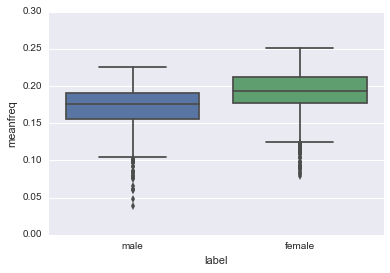

Success rate for sd at value 0.0518727983701 is 0.805555555556


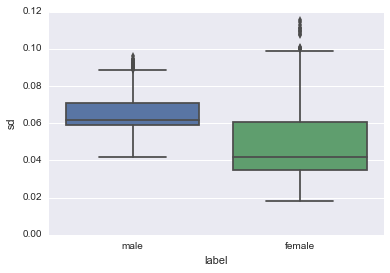

Success rate for median at value 0.189418997848 is 0.613636363636


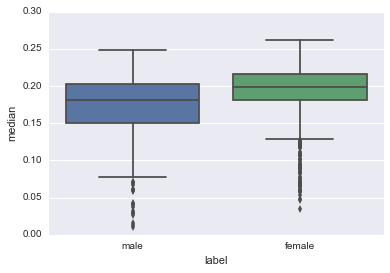

Success rate for Q25 at value 0.148844310276 is 0.868371212121


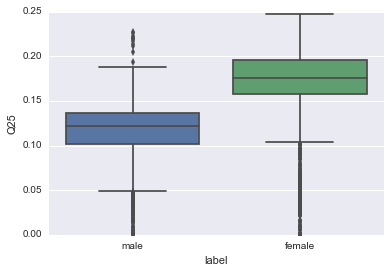

Success rate for Q75 at value 0.225930872003 is 0.531881313131


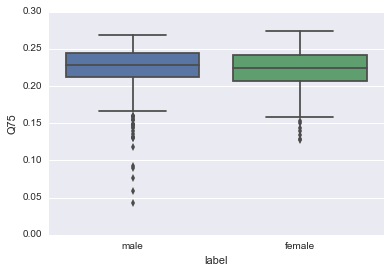

Success rate for IQR at value 0.0763143513787 is 0.891098484848


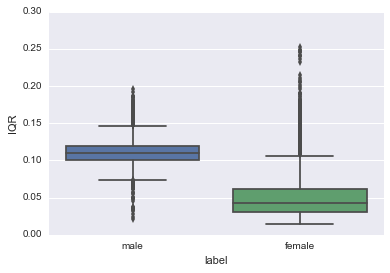

Success rate for skew at value 2.15811441441 is 0.631313131313


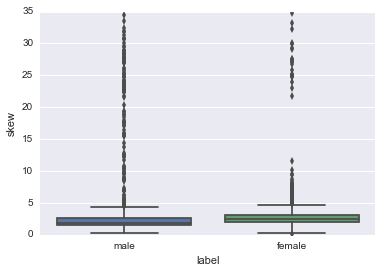

Success rate for kurt at value 8.28886148776 is 0.605113636364


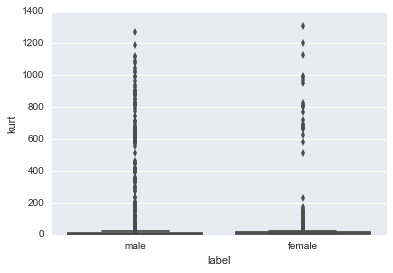

Success rate for sp.ent at value 0.891584753488 is 0.75726010101


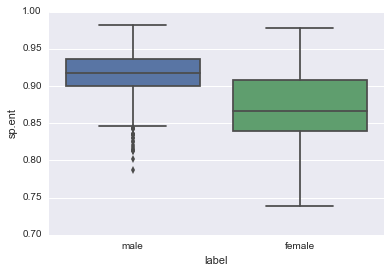

Success rate for sfm at value 0.369431762561 is 0.698547979798


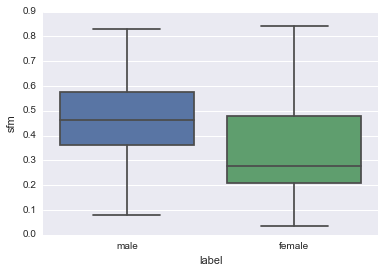

Success rate for mode at value 0.175613295135 is 0.612058080808


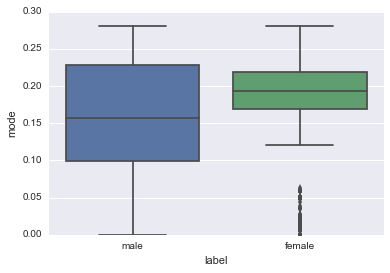

Success rate for centroid at value 0.184537608186 is 0.645202020202


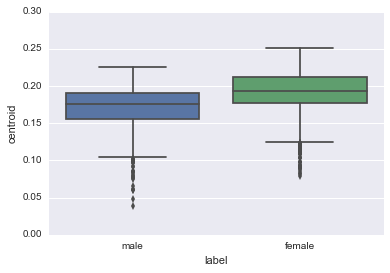

Success rate for meanfun at value 0.143330595086 is 0.952335858586


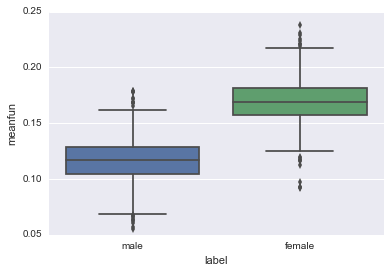

Success rate for minfun at value 0.0415896080802 is 0.545138888889


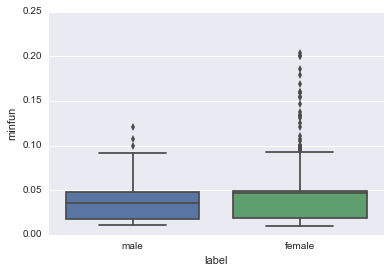

Success rate for maxfun at value 0.272736077482 is 0.553345959596


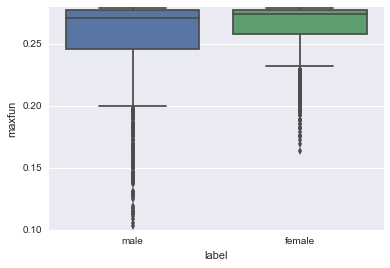

Success rate for meandom at value 0.777046087481 is 0.563762626263


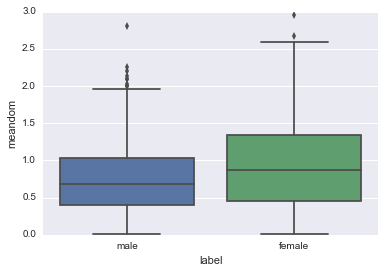

Success rate for mindom at value 0.0234375 is 0.556502525253


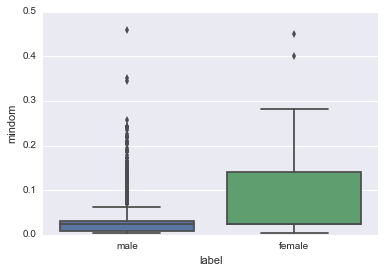

Success rate for maxdom at value 5.25 is 0.604166666667


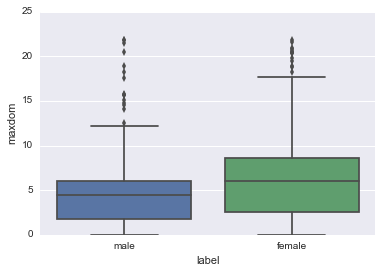

Success rate for dfrange at value 5.197265625 is 0.601641414141


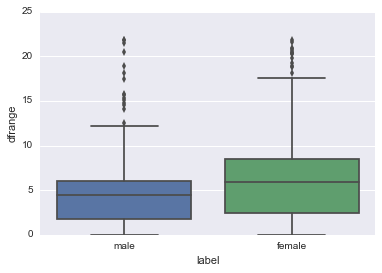

Success rate for modindx at value 0.139449498153 is 0.502840909091


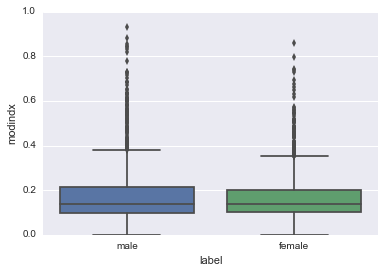

In [42]:
for col in list(X.columns.values):
    # find the median feature value for male and female
    median_male = df.groupby("label").median().loc['male',col]
    median_female = df.groupby("label").median().loc['female',col]
    
    # find feature threshold
    mid_val = (median_male + median_female)/2
    
    if mid_val < median_male:
        greater_pred = 'male'
        smaller_pred = 'female'
    else:
        greater_pred = 'female'
        smaller_pred = 'male'
    preds = [''] * 3168
    
    # make prediction using the feature threshold
    for i in xrange(3168):
        if X.loc[i, col] > mid_val:
            preds[i] = greater_pred
        else:
            preds[i] = smaller_pred

    print "Success rate for", col, "at value", mid_val,  "is", accuracy_score(y, preds)
    sns.boxplot(x="label", y=col, data=df )
    sns.plt.show()

As we can see in the data exploratory analysis, success rate for meanfun,  IQR, Q25, sd, sp.ent in decreasing order ranging from 95% to 75%

# Models

## 1. Perceptron

In [14]:
def perceptron(X, y, maxsteps=100, random=False):
    y_new = np.zeros(len(y))
    y_new = [1  if k=='female' else -1 for k in y]
    y = y_new
    
    w = np.random.rand(np.shape(X)[1],)
    i = 1
    count_best = len(y) + 1
    while i <= maxsteps:
        count = 0                     # counter for no. of misclassified points in the current iteration
        if not random:
            for j in xrange(len(y)):             # iterate over the data points
                if (y[j] * np.dot(X[j,:], w) ) < 0.: # if the data point is misclassified
                    w = w + y[j]*X[j,:]     # update the weight vector
                    count += 1            # increment counter
        else:                         # random case
            indices = np.random.permutation(len(y))
            for j in indices:
                if (y[j] * np.dot(X[j,:], w) ) < 0.: # if the data point is misclassified
                    w = w + y[j]*X[j,:]     # update the weight vector
                    count += 1            # increment counter
        
        if count < count_best:         # save the best weights
            w_best = w
            count_best = count
        
        if count == 0:                 # if there are no misclassifications in the most recent iteration, then stop
            print "No. of iterations taken to converge: ", i
            break
        i += 1
    
    if i > maxsteps:
        print "Perceptron did not converge in the given maximum iterations: ", maxsteps
    
    return w_best, count_best

In [68]:
w_perceptron, count = perceptron(np.array(x_full_train), np.array(y_full_train), maxsteps = 1000)

Perceptron did not converge in the given maximum iterations:  1000


In [69]:
w_perceptron

array([   675.05432241,  -1381.53939116,   1498.66129031,   5509.40726427,
        -2548.98420869,  -8058.69947407,   1108.53938583,    -40.46430397,
        -5641.0267346 ,   1695.42331367,  -1261.88756334,    674.97402308,
        16884.91987301,    -82.5804691 ,   2141.00557066,    181.0865665 ,
          509.19326577,    236.82773553,   -271.471811  ,    149.20399575])

In [70]:
print "Using the pocket learning algorithm, the best w misclassifies", count, "/", len(y_train), "points"

Using the pocket learning algorithm, the best w misclassifies 622 / 2217 points


In [71]:
y_test_raw = np.dot(x_test, w_perceptron)
y_test_preds = ['female' if k > 1 else 'male' for k in y_test_raw]
print "Accuracy of the pocket learning algorithm on the test set -"
print accuracy_score(y_test, y_test_preds)

Accuracy of the pocket learning algorithm on the test set -
0.832807570978


## 2. Support Vector Machine (SVM)

We use the RBF kernel and use a validation set to find the best hyperparameters for the support vector machine classifier.

Best C value: 500 with validation accuracy  0.905362776025


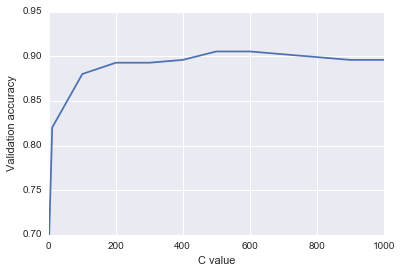

In [130]:
C_values = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
bestScore = 0.
scores = []
for c in C_values:
    svmclf = svm.SVC(C=c)
    svmclf.fit(x_train, y_train)
    preds = svmclf.predict(x_val)
    score = accuracy_score(y_val, preds)
    scores.append(score)
    if score > bestScore:
        bestScore = score
        bestC_svm = c

plt.plot(C_values, scores)
plt.xlabel('C value')
plt.ylabel('Validation accuracy')

print "Best C value:", bestC_svm, "with validation accuracy ", bestScore

We now retrain the classifier on the full train set with the best C value. 

In [128]:
svmclf = svm.SVC(C=bestC_svm)
svmclf.fit(x_full_train, y_full_train)
preds = svmclf.predict(x_test)
print "Accuracy of the support vector machine algorithm on the test set -"
print accuracy_score(y_test, preds)

Accuracy of the support vector machine algorithm on the test set -
0.92429022082


## 3. Logistic Regression

Same as above, we use a validation set to find the best C value. 

Best C value: 400 with validation accuracy  0.96214511041


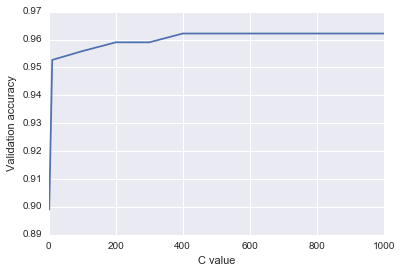

In [131]:
C_values = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
bestScore = 0.
scores = []
for c in C_values:
    logreg = linear_model.LogisticRegression(C=c, penalty='l2')
    logreg.fit(x_train, y_train)
    preds = logreg.predict(x_val)
    score = accuracy_score(y_val, preds)
    scores.append(score)
    if score > bestScore:
        bestScore = score
        bestC_logreg = c

plt.plot(C_values, scores)
plt.xlabel('C value')
plt.ylabel('Validation accuracy')

print "Best C value:", bestC_logreg, "with validation accuracy ", bestScore

We now retrain the classifier on the full train set with the best C value. 

In [132]:
logreg = linear_model.LogisticRegression(C=bestC_logreg, penalty='l2')
logreg.fit(x_full_train, y_full_train)
preds = logreg.predict(x_test)
print "Accuracy of the logistic regression model on the test set -"
print accuracy_score(y_test, preds)

Accuracy of the logistic regression model on the test set -
0.981072555205


## 4. Random Forest

Parameters of this classifier are the number of estimators (no. of trees in the forest) and the maximum depth of each tree. We again use a validation set to find the best values for these parameters. 

In [106]:
# Fit a random forest classifier
estimator_values = [10, 100, 250, 500, 1000]
maxdepth_values = [1, 2, 3, 4, 5]

bestScore = 0.
for n in estimator_values:
    for d in maxdepth_values:
        rf = RandomForestClassifier(n_estimators = n, max_depth = d)
        rf.fit(x_train, y_train)
        preds = rf.predict(x_val)
        score = accuracy_score(y_val, preds)
        if score > bestScore:
            bestScore = score
            bestN = n
            bestD = d

print "Best N value:", bestN 
print "Best D value:", bestD 
print "with validation accuracy ", bestScore

Best N value: 100
Best D value: 5
with validation accuracy  0.97476340694


In [107]:
rf = RandomForestClassifier(n_estimators = bestN, max_depth = bestD)
rf.fit(x_full_train, y_full_train)
preds = rf.predict(x_test)
print "Accuracy of the Random Forest classifier on the test set -"
print accuracy_score(y_test, preds)

Accuracy of the Random Forest classifier on the test set -
0.981072555205


## 5. Principal Component Analysis (PCA)

Although the dimensionality of the data is not too high, PCA might help reduce some noise. So we perform PCA on the train data matrix and observe its eigenvalues to decide how many dimensions we want to keep.

In [108]:
np.shape(x_full_train)

(2534, 20)

In [142]:
pca = PCA(n_components=20)
pca.fit(x_full_train)

PCA(copy=True, n_components=20, whiten=False)

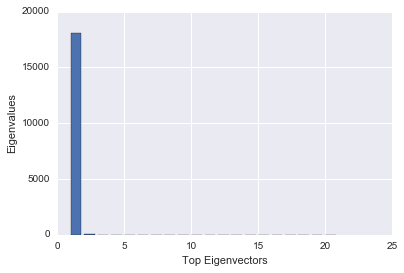

In [143]:
plt.bar(np.arange(1,21), pca.explained_variance_)
plt.xlabel('Top Eigenvectors')
plt.ylabel('Eigenvalues')

It's pretty clear that the first dimension has the highest variance and hence the highest amount of information. Let's also look the ratio of each eigenvalue to the sum of all eigenvalues. 

In [144]:
print pca.explained_variance_

[  1.80351893e+04   2.34298632e+01   8.02059666e-01   9.28804120e-02
   2.76782488e-02   9.37467482e-03   4.88957646e-03   3.22736035e-03
   1.57796156e-03   1.05139736e-03   8.70630384e-04   4.86942907e-04
   2.54480919e-04   1.80224099e-04   1.53238660e-04   2.63368770e-05
   6.06071633e-06   7.06388150e-30   5.99086202e-32   3.44692650e-35]


In [145]:
sum(pca.explained_variance_ratio_[:2])

0.99994768881364826

If we were to keep the top 3 dimensions, we would be retaining 99.99% of the information. 

Let's rerun some of our previous models using this new data to see if we can improve. First we need to project all of our data into these dimensions.

In [160]:
i = 15
x_full_train_pca = pca.transform(x_full_train)[:,:i]
x_train_pca = pca.transform(x_train)[:,:i]
x_val_pca = pca.transform(x_val)[:,:i]
x_test_pca = pca.transform(x_test)[:,:i]

In [161]:
print np.shape(x_full_train_pca)
print np.shape(x_train_pca)
print np.shape(x_val_pca)
print np.shape(x_test_pca)

(2534, 15)
(2217, 15)
(317, 15)
(634, 15)


### Support Vector Machine

Best C value: 400 with validation accuracy  0.895899053628


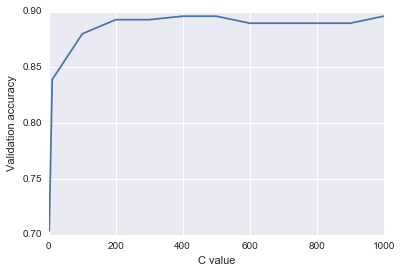

In [152]:
C_values = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
bestScore = 0.
scores = []
for c in C_values:
    svmclf = svm.SVC(C=c)
    svmclf.fit(x_train_pca, y_train)
    preds = svmclf.predict(x_val_pca)
    score = accuracy_score(y_val, preds)
    scores.append(score)
    if score > bestScore:
        bestScore = score
        bestC_svm = c

plt.plot(C_values, scores)
plt.xlabel('C value')
plt.ylabel('Validation accuracy')

print "Best C value:", bestC_svm, "with validation accuracy ", bestScore

In [153]:
svmclf = svm.SVC(C=bestC_svm)
svmclf.fit(x_full_train_pca, y_full_train)
preds = svmclf.predict(x_test_pca)
print "Accuracy of the support vector machine algorithm on the test set -"
print accuracy_score(y_test, preds)

Accuracy of the support vector machine algorithm on the test set -
0.913249211356


### Logistic Regression

Best C value: 400 with validation accuracy  0.965299684543


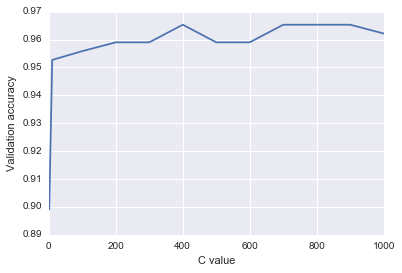

In [162]:
C_values = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
bestScore = 0.
scores = []
for c in C_values:
    logreg = linear_model.LogisticRegression(C=c, penalty='l2')
    logreg.fit(x_train_pca, y_train)
    preds = logreg.predict(x_val_pca)
    score = accuracy_score(y_val, preds)
    scores.append(score)
    if score > bestScore:
        bestScore = score
        bestC_logreg = c

plt.plot(C_values, scores)
plt.xlabel('C value')
plt.ylabel('Validation accuracy')

print "Best C value:", bestC_logreg, "with validation accuracy ", bestScore

In [163]:
logreg = linear_model.LogisticRegression(C=bestC_logreg, penalty='l2')
logreg.fit(x_full_train_pca, y_full_train)
preds = logreg.predict(x_test_pca)
print "Accuracy of the logistic regression model on the test set -"
print accuracy_score(y_test, preds)

Accuracy of the logistic regression model on the test set -
0.981072555205


### Random Forest

In [164]:
# Fit a random forest classifier
estimator_values = [10, 100, 250, 500, 1000]
maxdepth_values = [1, 2, 3, 4, 5]

bestScore = 0.
for n in estimator_values:
    for d in maxdepth_values:
        rf = RandomForestClassifier(n_estimators = n, max_depth = d)
        rf.fit(x_train_pca, y_train)
        preds = rf.predict(x_val_pca)
        score = accuracy_score(y_val, preds)
        if score > bestScore:
            bestScore = score
            bestN = n
            bestD = d

print "Best N value:", bestN 
print "Best D value:", bestD 
print "with validation accuracy ", bestScore

Best N value: 250
Best D value: 5
with validation accuracy  0.943217665615


In [165]:
rf = RandomForestClassifier(n_estimators = bestN, max_depth = bestD)
rf.fit(x_full_train_pca, y_full_train)
preds = rf.predict(x_test_pca)
print "Accuracy of the Random Forest classifier on the test set -"
print accuracy_score(y_test, preds)

Accuracy of the Random Forest classifier on the test set -
0.951104100946
